In [ ]:
import seaborn as sns


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the datasets
train_df = pd.read_csv('/content/Training Data.csv')
test_df = pd.read_csv('/content/Test Data.csv')

print("Training Dataset:\n", train_df.head())
print("Testing Dataset:\n", test_df.head())


Training Dataset:
    Id   income  age  experience  married house_ownership car_ownership  \
0   1  1303835   23           3   single          rented            no   
1   2  7574516   40          10   single          rented            no   
2   3  3991815   66           4  married          rented            no   
3   4  6256451   41           2   single          rented           yes   
4   5  5768871   47          11   single          rented            no   

            profession                 city           state  \
0  Mechanical_engineer                 Rewa  Madhya_Pradesh   
1   Software_Developer             Parbhani     Maharashtra   
2     Technical_writer            Alappuzha          Kerala   
3   Software_Developer          Bhubaneswar          Odisha   
4        Civil_servant  Tiruchirappalli[10]      Tamil_Nadu   

   current_job_years  current_house_years  risk_flag  
0                  3                   13          0  
1                  9                   13      

In [ ]:
train_df

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [ ]:

# Check for missing values
print("Missing values in training set:\n", train_df.isnull().sum())
print("Missing values in testing set:\n", test_df.isnull().sum())

Missing values in training set:
 Id                     0
income                 0
age                    0
experience             0
married                0
house_ownership        0
car_ownership          0
profession             0
city                   0
state                  0
current_job_years      0
current_house_years    0
risk_flag              0
dtype: int64
Missing values in testing set:
 id                     0
income                 0
age                    0
experience             0
married                0
house_ownership        0
car_ownership          0
profession             0
city                   0
state                  0
current_job_years      0
current_house_years    0
dtype: int64


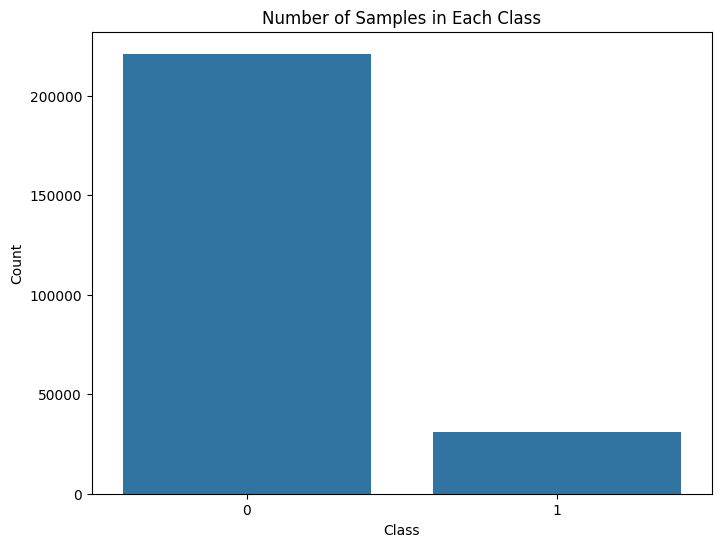

In [ ]:
# Separating features and target
X = train_df.drop('risk_flag', axis=1)  # Replace 'target' with the actual target column name
y = train_df['risk_flag']  # Replace 'target' with the actual target column name

# Visualizing number of samples in each class
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title("Number of Samples in Each Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

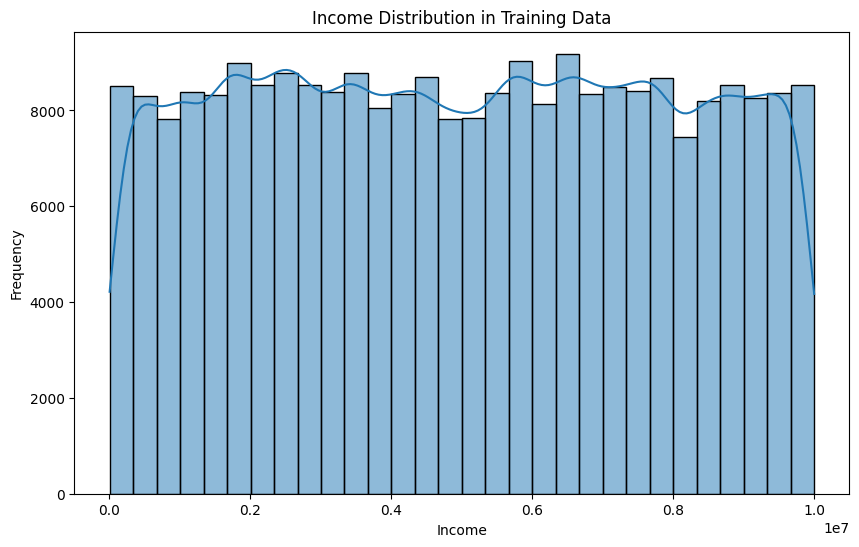

In [ ]:
# Income distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_df['income'], kde=True, bins=30)
plt.title('Income Distribution in Training Data')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

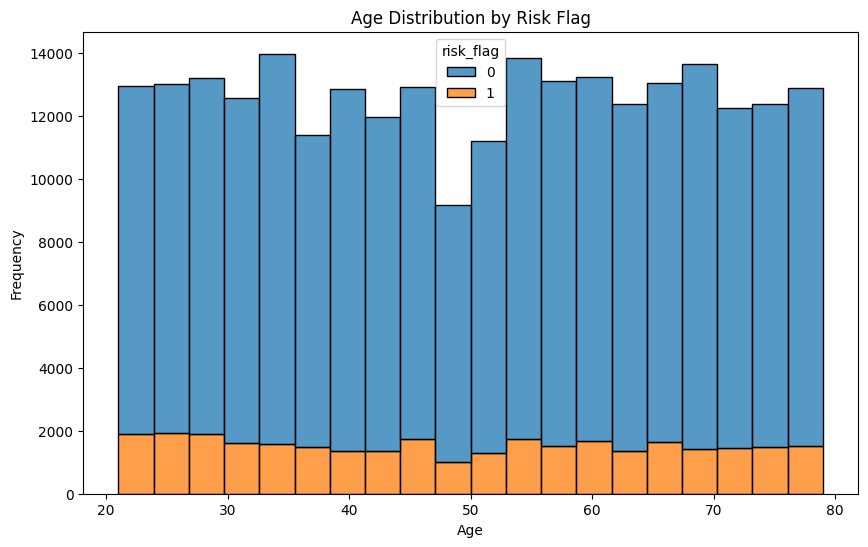

In [ ]:
# Age distribution by risk flag
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='age', hue='risk_flag', multiple='stack', bins=20)
plt.title('Age Distribution by Risk Flag')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

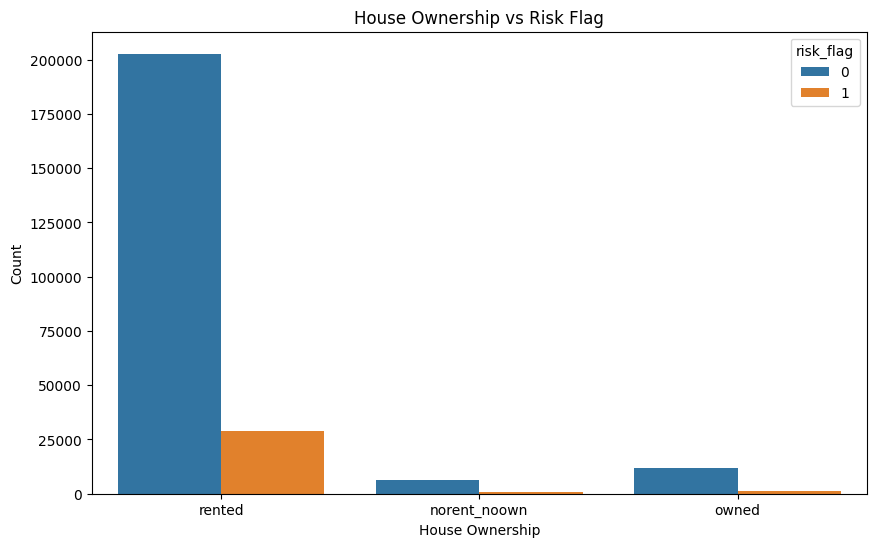

In [ ]:
# House ownership vs risk flag count
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='house_ownership', hue='risk_flag')
plt.title('House Ownership vs Risk Flag')
plt.xlabel('House Ownership')
plt.ylabel('Count')
plt.show()

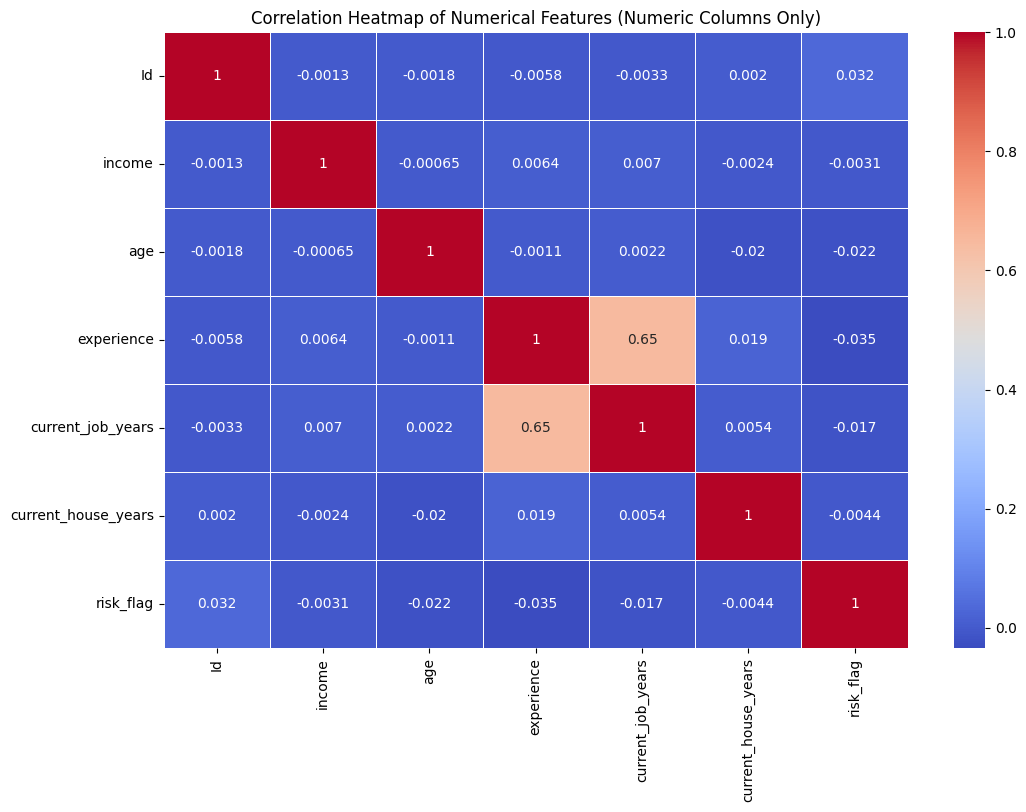

In [ ]:
# Select only numerical columns for the correlation heatmap
numeric_columns = train_df.select_dtypes(include=['int64', 'float64'])

# Correlation heatmap of numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features (Numeric Columns Only)')
plt.show()

In [ ]:
# Handling missing values by filling with mode or dropping
train_df = train_df.fillna(train_df.mode().iloc[0])

# Handling categorical features by one-hot encoding
train_df = pd.get_dummies(train_df)

# Check for duplicate rows
duplicate_count = train_df.duplicated().sum()
print(f"Number of duplicated rows in the dataset: {duplicate_count}")

# Number of features in the dataset
num_features = train_df.shape[1] - 1  # Subtracting 1 to exclude the target column if present
print(f"Number of features in the dataset: {num_features}")

# Standardizing the data
scaler = StandardScaler()
X = train_df.drop('target', axis=1, errors='ignore')  # Replace 'target' with the actual target column name if present
X_scaled = scaler.fit_transform(X)


Number of duplicated rows in the dataset: 0
Number of features in the dataset: 410


In [ ]:
train_df.head()

,Id,income,age,experience,current_job_years,current_house_years,risk_flag,married_married,married_single,house_ownership_norent_noown,...,state_Punjab,state_Rajasthan,state_Sikkim,state_Tamil_Nadu,state_Telangana,state_Tripura,state_Uttar_Pradesh,state_Uttar_Pradesh[5],state_Uttarakhand,state_West_Bengal
0,1,1303835,23,3,3,13,0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,2,7574516,40,10,9,13,0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,3,3991815,66,4,4,10,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,6256451,41,2,2,12,1,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,5,5768871,47,11,3,14,1,False,True,False,...,False,False,False,True,False,False,False,False,False,False


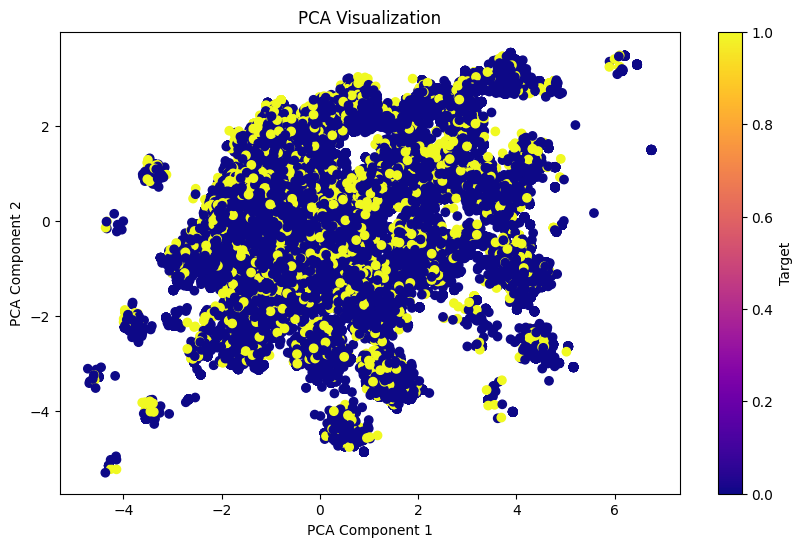

In [ ]:

# Visualization 4: Principal Component Analysis (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='plasma')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization')
plt.colorbar(label='Target')
plt.show()

In [ ]:
# Check for duplicate rows
duplicate_count = train_df.duplicated().sum()

print(f"Number of duplicated rows in the dataset: {duplicate_count}")

Number of duplicated rows in the dataset: 0


In [ ]:
# Number of features in the dataset
num_features = train_df.shape[1] - 1  # Subtracting 1 to exclude the target column if present
print(f"Number of features in the dataset: {num_features}")

Number of features in the dataset: 410
